## New York Times Covid-19 data (Github) 

This demonstrates one of the most useful features of `pd.read_csv`.  It can be given
a URl as an argument.

So Published data sets like this one:

**Data from The New York Times, based on reports from state and local health agencies**

are easily accessed. Read about this data set at [the Github site.](https://github.com/nytimes/covid-19-data)



In [75]:
import pandas as pd

def geoid2code(geoid):
    return int(geoid[4:])

# this data set has cumulative stats
nyt_github_covid_cumulative = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/us-counties.csv'
nyt_github_covid_rolling_avg = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/rolling-averages/us-counties.csv'
df = pd.read_csv(nyt_github_covid_rolling_avg,converters=dict(geoid=geoid2code))
df.rename(columns={'geoid': 'GEOID'},inplace=True)

In [76]:
type(df['GEOID'].values[0])

numpy.int64

I grew up in Cook County.  It is where Chicago is.

In [77]:
df[df['county']=='Cook']

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00
6,2020-01-25,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
9,2020-01-26,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
14,2020-01-27,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
19,2020-01-28,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1770334,2021-09-28,17031,Cook,Illinois,486,748.00,14.52,17,10.29,0.20
1770523,2021-09-28,13075,Cook,Georgia,2,4.00,23.16,0,0.14,0.83
1772856,2021-09-29,27031,Cook,Minnesota,1,0.57,10.46,0,0.00,0.00
1773582,2021-09-29,17031,Cook,Illinois,764,723.00,14.04,4,9.29,0.18


Oops, it looks like there are some other Cook Counties!

In [171]:
df2 = df[(df['county']=='Cook') & (df['state']=='Illinois')]
df2

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00
6,2020-01-25,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
9,2020-01-26,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
14,2020-01-27,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
19,2020-01-28,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1760590,2021-09-25,USA-17031,Cook,Illinois,0,865.71,16.81,0,8.86,0.17
1763838,2021-09-26,USA-17031,Cook,Illinois,0,865.71,16.81,0,8.86,0.17
1767086,2021-09-27,USA-17031,Cook,Illinois,1924,786.86,15.28,21,8.57,0.17
1770334,2021-09-28,USA-17031,Cook,Illinois,486,748.00,14.52,17,10.29,0.20


In [129]:
cty,state = "Pittsburgh","Florida"
this_df = df[(df['county']== cty) & (df['state']==state)]
#counties = df[(df['state']==state)]['county'].values
#set(counties)
this_df

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
1316,2020-03-11,USA-12086,Miami-Dade,Florida,1,0.14,0.01,0,0.00,0.00
1564,2020-03-12,USA-12086,Miami-Dade,Florida,1,0.29,0.01,0,0.00,0.00
1868,2020-03-13,USA-12086,Miami-Dade,Florida,6,1.14,0.04,0,0.00,0.00
2235,2020-03-14,USA-12086,Miami-Dade,Florida,0,1.14,0.04,0,0.00,0.00
2654,2020-03-15,USA-12086,Miami-Dade,Florida,5,1.86,0.07,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1760841,2021-09-25,USA-12086,Miami-Dade,Florida,0,1035.43,38.11,346,49.43,1.82
1764089,2021-09-26,USA-12086,Miami-Dade,Florida,0,1035.43,38.11,0,49.43,1.82
1767337,2021-09-27,USA-12086,Miami-Dade,Florida,0,1035.43,38.11,0,49.43,1.82
1770585,2021-09-28,USA-12086,Miami-Dade,Florida,0,1035.43,38.11,0,49.43,1.82


### Six cities

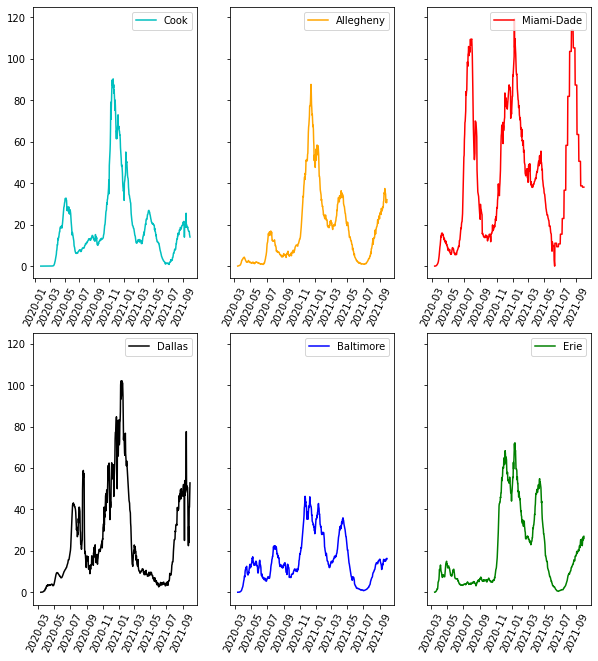

In [168]:
import numpy as np
import matplotlib.pylab as plt
import datetime

counties = np.array([[('Cook','Illinois'),
                      ('Allegheny','Pennsylvania'),
                     ('Miami-Dade','Florida')],
                      [('Dallas','Texas'),
                       ('Baltimore','Maryland'),
                        ('Erie',"New York")  
                      ]]
                   )
colors = np.array([['c','orange','red'],
                       ['k','b', 'g']])  

def plot_counties_data (counties,color=colors,figsize=(10,11),
                        data_col='cases_avg'):
    rows,cols,atts = counties.shape
    fig, axes = plt.subplots(rows,cols,sharey=True,figsize=figsize)
    if axes.ndim == 1:
        # make sure this is a 2D array
        axes = axes[np.newaxis,:]
    for r in range(rows):
        for c in range(cols):
            cty,state = counties[r,c]
            this_df = df[(df['county']== cty) & (df['state']==state)]
            times = np.array([datetime.date.fromisoformat(d) 
                              for d in this_df.date])
            plt.axes(axes[r,c])
            l, = plt.plot(times,this_df[data_col], label=cty)
            l.set_color(colors[r,c])
            plt.xticks(rotation=65)
            plt.legend()

plot_counties_data(counties,data_col='cases_avg_per_100k')

Validating the display vals for Cook county

In [18]:
import datetime
num_ticks = 10
inc = (end-start)/num_ticks
xvals2 = [datetime.date.fromisoformat(dt) for dt in df2.date]
xticks = [start + (i*inc) for i in range(num_ticks)]
# We're done doing date arithmetic, now strings
xticklabels = [xt.isoformat() for xt in xticks]
f = lambda d: df2[df2['date'] == d]['cases'].values/1e6
vals = [f(d) for d in xticklabels]
for d in  xticklabels:
    print(f'{d} {f(d)[0]:5.3f}')

2020-01-24 0.000
2020-04-18 0.020
2020-07-13 0.096
2020-10-07 0.150
2020-12-31 0.394
2021-03-27 0.494
2021-06-21 0.556
2021-09-14 0.606
2021-12-09 0.697


Using some of the code above for a simple display of `df2`.

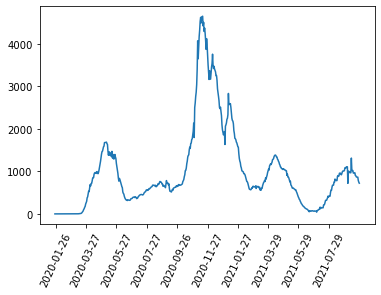

In [177]:
plt.plot(xvals2,df2.cases_avg)
ax = plt.gca()
ax.set_xticks(xticklabels)
val = plt.xticks(rotation=65)

### Some big cities

With shared y-axis, it's helpful to display the big cities
separate from the others.

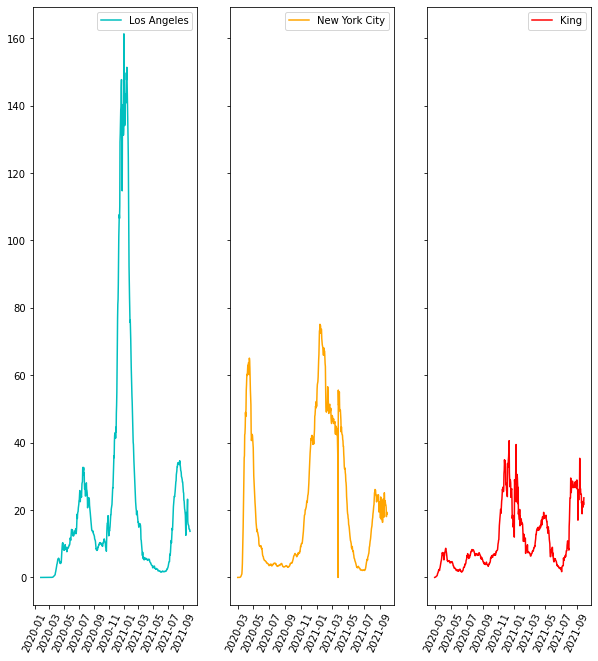

In [169]:
colors2 = colors[1,:][np.newaxis,:]
counties2 = np.array([[('Los Angeles','California'),
             ('New York City','New York'),
            ('King','Washington')]])
plot_counties_data (counties2,data_col='cases_avg_per_100k')

### Using Seaborn

I found it easy to use seaborn for the eays case, and difficult
to extend it to the multiplot case.  This was because I found it 
hard to tweak the date display on the x-axis when it was a multiple plot.

Your mileage may vary.

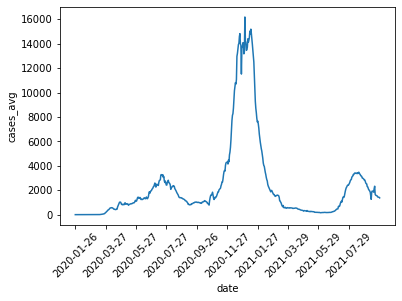

In [45]:
g = sns.lineplot(x='date', y='cases_avg', data=df_toplot)
g.set_xticks(xticklabels)
xts = plt.xticks(rotation=45)

### Adding Lat Longs to the data

The Geographical info is stored in a column named GEOID (we uppercased the name
on loading, for reasons that will become clear below).

In [89]:
df[:5]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


The GEOID column contains FIPS geographical codes that we can use to make maps
from the the data.

Problem is the programs we will use for that purpose want 
lat/long coordinates.

Solution: we got to the census.gov site and get mappings from geocodes
to lat/longs.  We turn this new data into a pandas DataFrame.  We then join
the new DataFrame to our old one.

In [90]:

#Normally you'd get this data heree from a compressed file.
true_url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2021_Gazetteer/'\
      '2021_Gaz_counties_national.zip'
# To simplify things Ive copied it here, uncompressed,
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/'\
      '2021_Gaz_counties_national.txt'
# The file uses tabs, not "," as a separator.  `pd.read_csv` still works if you 
# tell it that.
codes = pd.read_csv(url,sep='\t')
# last column name misparsed, many spaces added.  data cleanup
long = codes.columns[-1]
codes.rename(columns={long: long.strip()},inplace=True)
#Make the subtable we're going to join to.
geoid_lat_long = codes[['GEOID','INTPTLAT','INTPTLONG']]

In [86]:
codes[:5]

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1539634184,25674812,594.456,9.913,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4117656514,1132955729,1589.836,437.437,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2292160149,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1612188717,9572303,622.470,3.696,33.015893,-87.127148
4,AL,1009,161530,Blount County,1670259090,14860281,644.891,5.738,33.977358,-86.566440


In [31]:
codes[(codes['NAME']=='King County')&(codes['USPS']=='WA')]

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
2970,WA,53033,1531933,King County,5479337396,496938967,2115.584,191.869,47.490552,-121.833977


In [35]:
codes[(codes['GEOID']==53033)]

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
2970,WA,53033,1531933,King County,5479337396,496938967,2115.584,191.869,47.490552,-121.833977


In [91]:
#geoid_lat_long = codes[['GEOID','INTPTLAT','INTPTLONG']]
geoid_lat_long[:5]

,GEOID,INTPTLAT,INTPTLONG
0,1001,32.532237,-86.646440
1,1003,30.659218,-87.746067
2,1005,31.870253,-85.405104
3,1007,33.015893,-87.127148
4,1009,33.977358,-86.566440


In [92]:
geoid_lat_long.set_index('GEOID')[:5]

,INTPTLAT,INTPTLONG
GEOID,,
1001,32.532237,-86.646440
1003,30.659218,-87.746067
1005,31.870253,-85.405104
1007,33.015893,-87.127148
1009,33.977358,-86.566440


In [88]:
df[:5]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


In [96]:
new_df = df.join(geoid_lat_long.set_index('GEOID'),on='GEOID')

In [97]:
new_df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00,41.894294,-87.645455
...,...,...,...,...,...,...,...,...,...,...,...,...
1774199,2021-09-29,69120,Tinian,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00,NaN,NaN
1774200,2021-09-29,69110,Saipan,Northern Mariana Islands,0,0.43,0.89,0,0.00,0.00,NaN,NaN
1774201,2021-09-29,78030,St. Thomas,Virgin Islands,7,5.00,9.68,1,0.14,0.28,NaN,NaN
1774202,2021-09-29,78020,St. John,Virgin Islands,0,0.86,20.55,0,0.00,0.00,NaN,NaN


The places Ive got no lat long info for are also places that are a bit remioved from
the continental US.  They're going to be hard to represent in the same map.

So for map-drawing purposes I don't feel bad about omitting them.

In [108]:
new_df.dropna(inplace=True)

So here's a simple visualization of what we have, which can be improved greatly:

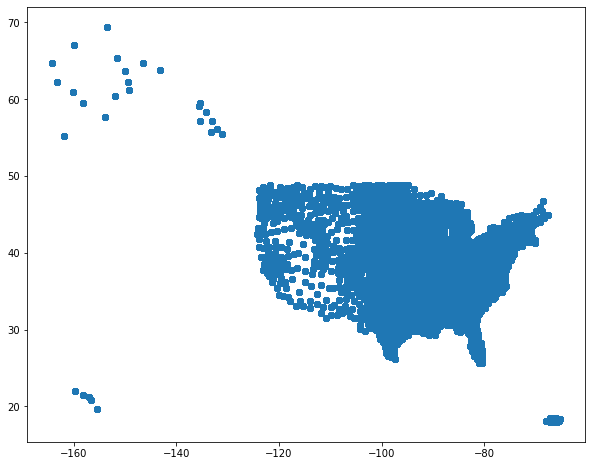

In [119]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,8))
# Get rid of an outlier
lat_lons = [(long,new_df.INTPTLAT.values[i]) for (i,long) in 
            enumerate(new_df.INTPTLONG.values) if long < 0]
lats,lons = zip(*lat_lons)
plt.scatter(lats,lons)

Hey that looks familiar!

But it's not very informative.  Ok.  A lot of covid.

What can we do to improve this?

See the [geographical visualization notebook.](https://github.com/gawron/python-for-social-science/blob/master/visualization/visualizing_geographic_data.ipynb)